In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 1 : Data Collection

In [2]:
filepath_House_Price = r"C:\Users\aakas\PythonStuff\Projects\Cali_HP\dataset\housing.csv"

In [3]:
houses = pd.read_csv(filepath_House_Price , header = 0 )

In [17]:
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## STEP 2 : Basic information about data

#### (i) For finding number of rows and columns

In [5]:
houses.shape

(20640, 10)

#### (ii) To see number of null values , datatypes and memory usage

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### INSIGHTS 

- **total_bedrooms** feature has null values

In [7]:
houses.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### (iii) Finding Duplicate rows

In [8]:
houses[houses.duplicated(keep = False)]

# no duplicated rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


#### (iv) Applying basic statstical computations on the dataset

- Extreme values (min & max values), 
- count of data points, 
- Quantiles, 
- mean ,
- standard deviation, etc.

In [9]:
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### INSIGHTS

#### Rough estimates:<br>

For Features : **total_rooms** , **total_bedrooms** , **population** , **households** ,  **median_income** ,  **median_house_value** <br>

**mean > median** <br>
Therefore , seems like distribution is right skewed

**Note :** Actual distribution will be  determined when we plot histogram-Kde plot for each numerical feature.

#### (v) Fetching numerical and categorical columns

In [10]:
def num_cat_col_list(DF) : 
    
    from pandas.api.types import is_string_dtype, is_numeric_dtype

    
    num_list = []
    cat_list = []

    for column in DF:

        if is_numeric_dtype(DF[column]):
            num_list.append(column)

        elif is_string_dtype(DF[column]):
            cat_list.append(column)

    return (num_list , cat_list)

In [11]:
num_list , cat_list = num_cat_col_list(houses)

print("Numerical column : ",num_list)
print()
print("Categorical column : ",cat_list)

Numerical column :  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

Categorical column :  ['ocean_proximity']


#### (vi) finding unique values in the categorical attributes

In [12]:
for col in cat_list:
    
    print(f"{col} : " ,houses[col].unique())

ocean_proximity :  ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


## STEP 3 : UNIVARIATE ANALYSIS

### (i) Histogram-kde  for Numerical  attributes.

In [13]:
def hist_kde_plot(DF , num_list):
    
    total_size1 = len(num_list) 

    n_cols1 = 2
    n_rows1 = int(np.ceil(total_size1/n_cols1))

    fig1,axes1 = plt.subplots(nrows = n_rows1 ,ncols = n_cols1 , figsize = (12,18))

    i = 0
    j = 0

    fig1.suptitle("HISTOGRAM \n", fontweight="bold" ,fontsize=20)


    for col in num_list:


        axes2 = sns.histplot(ax = axes1[i,j], data = DF , x = col ,kde =  True ,bins = 20)
        fig1.tight_layout()

        axes2.set_title(f"{col}",fontweight="bold" ,fontsize=12)

        if j == n_cols1 -1:

            i +=1
            j = 0

        else :
            j+=1  


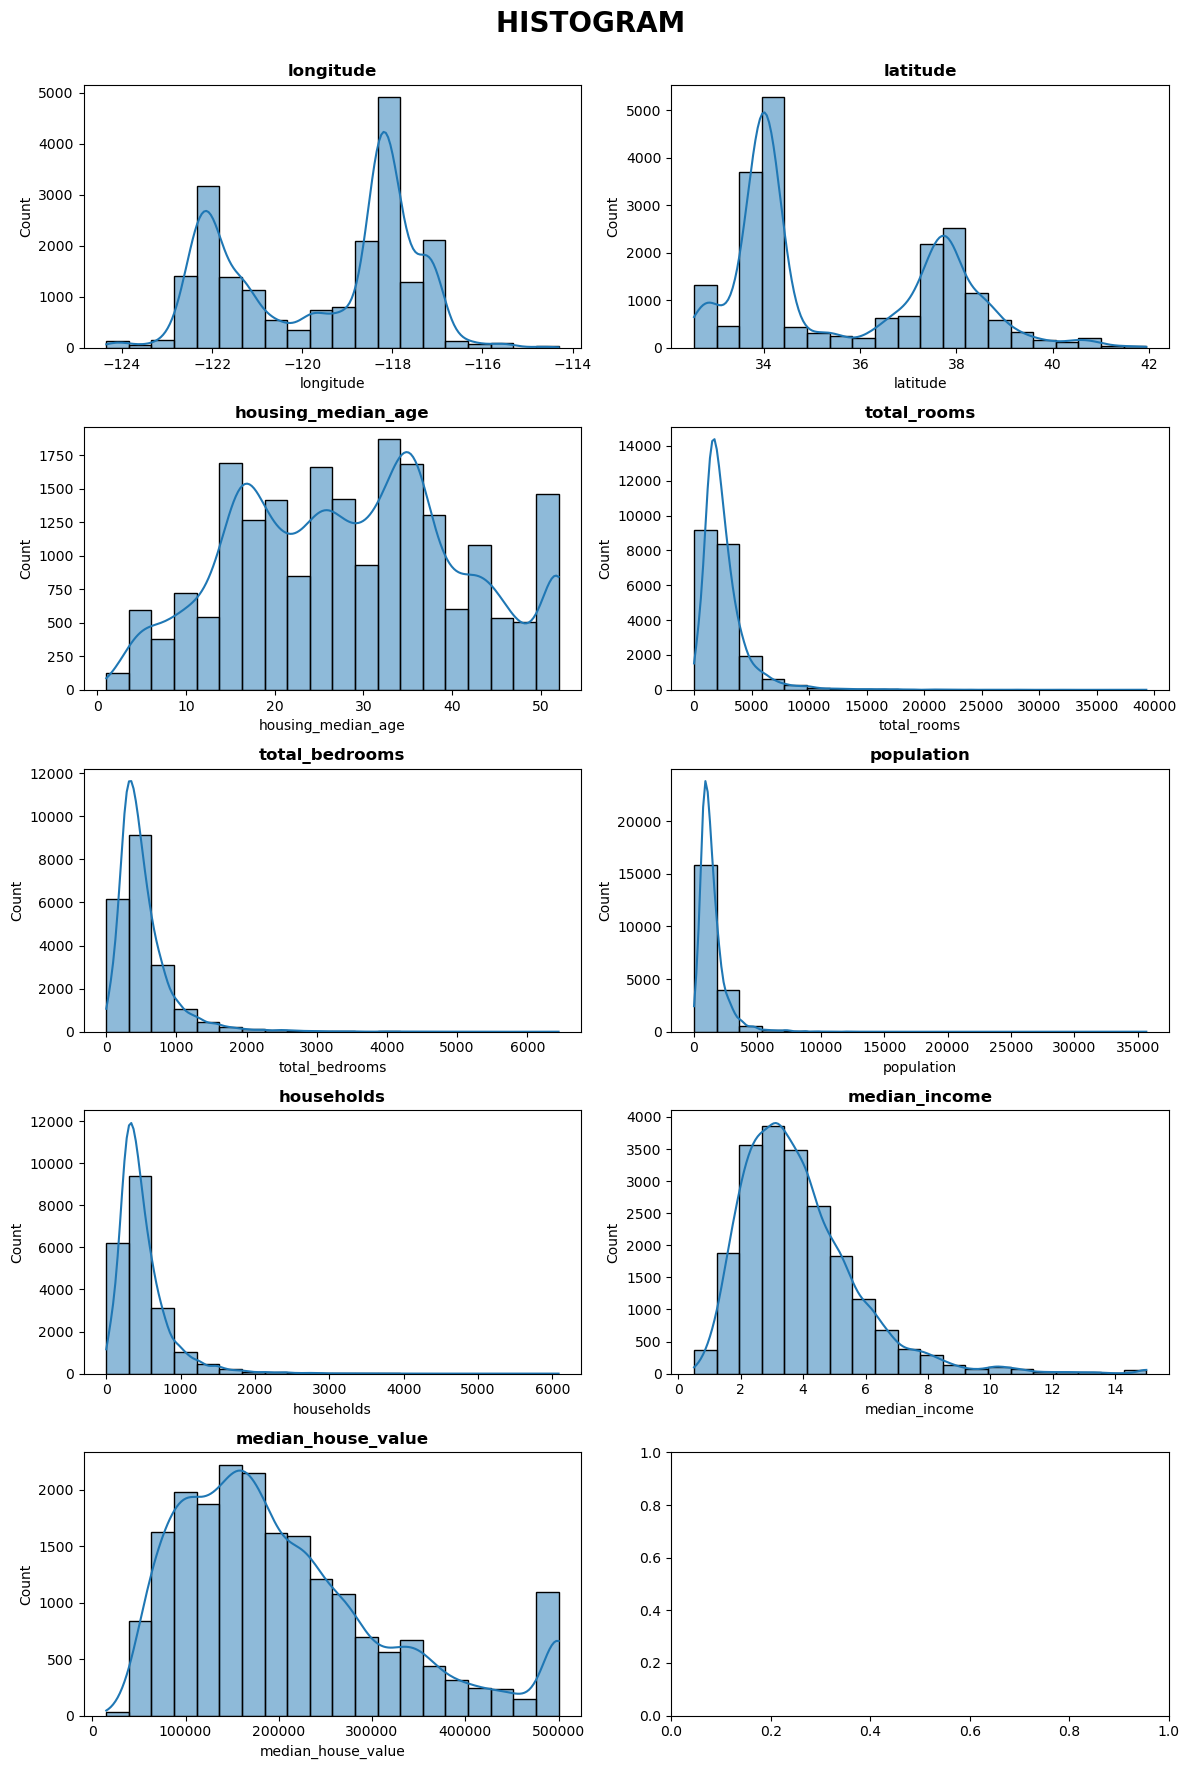

In [14]:
hist_kde_plot(DF = houses, num_list=num_list)

### INSIGHTS

**Skewed Distributed Features** : <br> 
total_rooms , total_bedrooms , population , households , median_income , median_house_value

### (ii) countplot for  categorical attributes 

In [17]:
def countplot_cat_col(DF,cat_list):
    
    total_size2 = len(cat_list)

    n_cols2 = 2
    n_rows2 = int(np.ceil(total_size2/n_cols2))

    fig3,axes3 = plt.subplots(nrows = n_rows2 ,ncols = n_cols2 , figsize = (10,4))
    fig3.tight_layout()

    i = 0

    fig3.suptitle("COUNTPLOTS \n", fontweight="bold" ,fontsize=20)

    for col in cat_list:

        fig3.tight_layout()

        axes4 = sns.countplot(ax = axes3[i], data = DF , x = col ,hue = col )

        axes4.set(xticklabels=[])
        axes4.set(xlabel=None)
        axes4.set_title(f"{col}",fontweight="bold" ,fontsize=12)

        axes4.set(ylabel='Frequency')
        axes4.grid(visible=True ,axis ='y')

In [18]:
cat_list

['ocean_proximity']

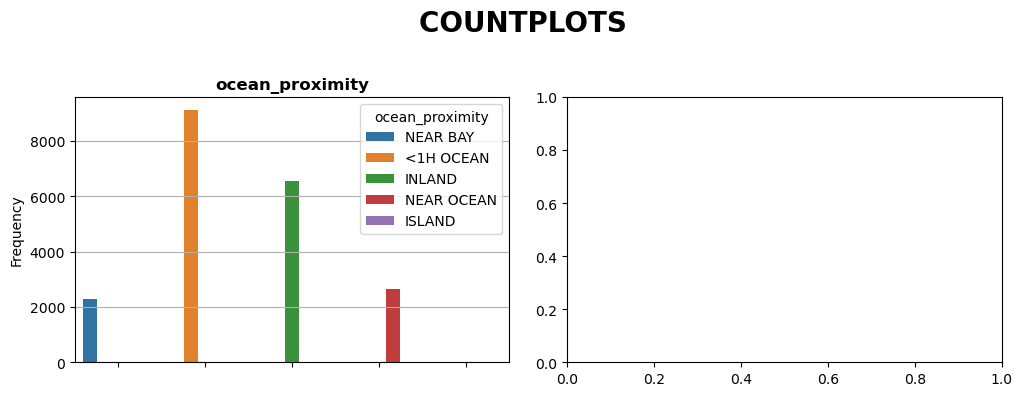

In [19]:
countplot_cat_col(DF = houses , cat_list=cat_list)

### (iii) Boxplot for numerical attributes for finding the outleirs

- **Normally Distributed Features :** NONE
- **Skewed Distributed Features :** 
 total_rooms , total_bedrooms , population , households , median_income   
                         

In [14]:
# normally , almost normally or skewed distributed Features.

cols = ['total_rooms','total_bedrooms','population','households','median_income']

In [21]:
def boxplot(DF , cols):
    
    total_size_num = len(cols) 
 
    n_cols=2
    n_rows= int(np.ceil(total_size_num/n_cols))

    fig5, axes5 = plt.subplots(nrows=n_rows, ncols=n_cols , figsize = (12,8),)

    i = 0
    j = 0


    fig5.suptitle("BOXPLOTS\n", fontweight="bold" ,fontsize=20)
    fig5.tight_layout()

    for col in cols:

        axes6 = DF[col].plot.box(ax = axes5[i,j],vert = 0)
        axes6.set_title(f"{col}",fontweight="bold" ,fontsize=12)

        axes6.set(yticklabels=[])
        fig5.tight_layout()

        if j == n_cols-1:
            i = i + 1
            j = 0

        else:
            j = j + 1
    

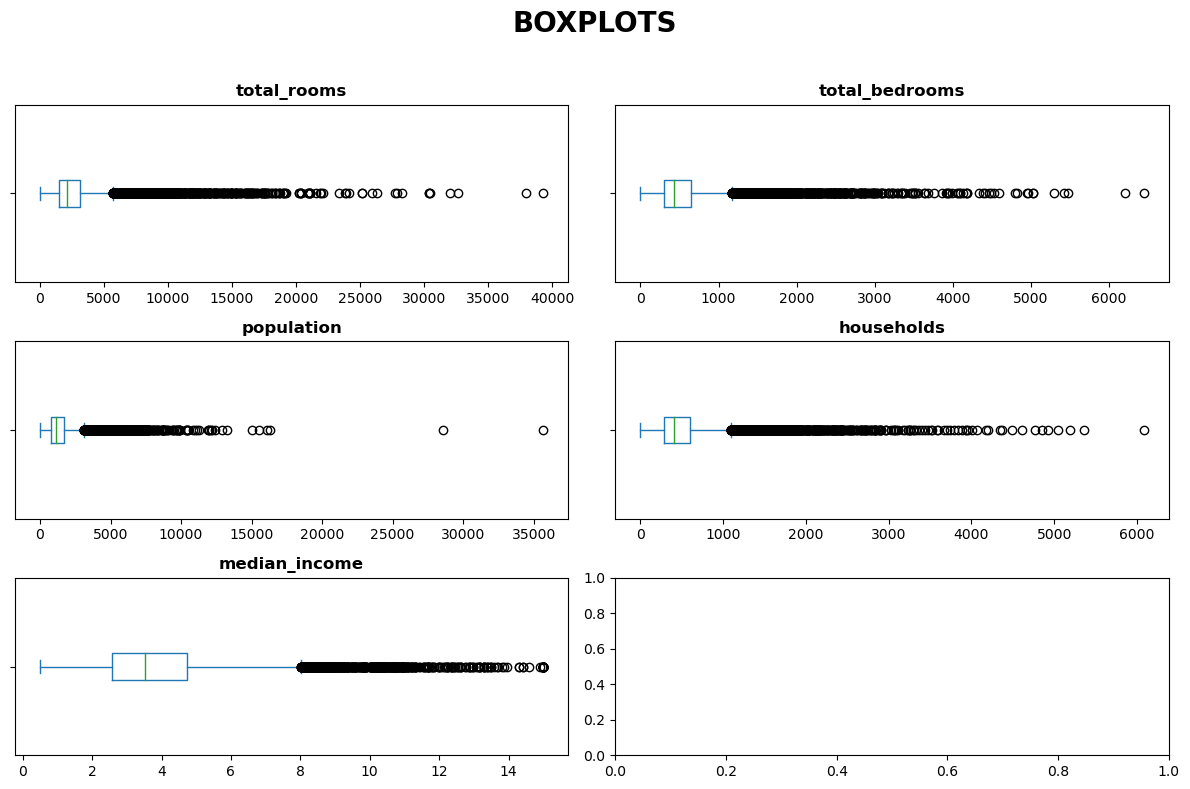

In [22]:
boxplot(DF = houses , cols =cols )

### INSIGHTS

**Features** : total_rooms , total_bedrooms , population , households , median_income **have outliers.**

## STEP - 4 : Bi-Variate Analysis

- **Bivariate analysis** is categorized into these three conditions to address various combinations of
  numerical variables and categorical variables.

### (i) Numerical vs. Numerical → heat map or pairplot

In [23]:
def correlation_map(DF):
    
    correlation = round(DF.corr(numeric_only =True),3)
    
    plt.figure(figsize = (8,6) ,dpi = 120 , layout = 'tight' )
    sns.heatmap(correlation,cmap = 'GnBu' , annot = True)

    plt.show()  

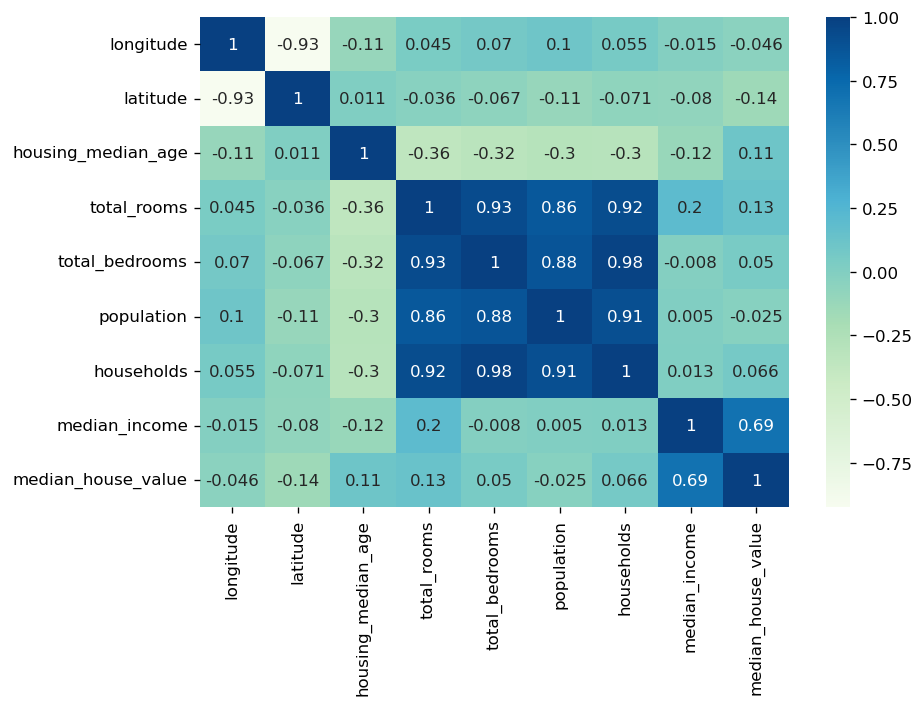

In [24]:
correlation_map(DF = houses)

### INSIGHTS

- **longitude** and **latitude** has correlation coeff. = -0.93
- **total_rooms** and **total_bedrooms** has correlation coeff. = 0.93
- **total_rooms** and **population** has correlation coeff. = 0.86
- **total_rooms** and **households** has correlation coeff. = 0.92
- **total_bedrooms** and **population** has correlation coeff. = 0.88
- **total_bedrooms** and **households** has correlation coeff. = 0.98
- **population** and **households** has correlation coeff. = 0.91

In [33]:
# houses.columns 

In [27]:
houses.corrwith(other = houses['median_house_value'] ,numeric_only= True).sort_values(ascending=False, 
                                                                         key=lambda x: abs(x))

median_house_value    1.000000
median_income         0.688075
latitude             -0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude            -0.045967
population           -0.024650
dtype: float64

### (ii) Scatterplot with hue

In [29]:
def scatterplot(DF,num_list):
    
    num_list_test = num_list.copy()
    num_list_test.remove('median_house_value')
    
    n_cols = 2
    n_rows = int(np.ceil(len(num_list_test)/ n_cols))


    fig11, axes11 = plt.subplots(nrows=n_rows, ncols=n_cols , figsize = (12,16),)

    fig11.suptitle("ScatterPlots\n\n", fontweight="bold" ,fontsize=20)

    fig11.tight_layout()

    i = 0
    j = 0

    for column in num_list_test : 

        fig11.tight_layout()

        axes12 = sns.scatterplot(ax = axes11[i,j], data = DF , y = 'median_house_value' ,
                                 x = column, 
                                 hue= 'ocean_proximity',
                                )

        axes12.set_title(f"Median house value vs : {column}" , fontsize = 14 , fontweight = 'bold')

        if j == n_cols-1:
            i = i + 1
            j = 0

        else:
            j = j + 1


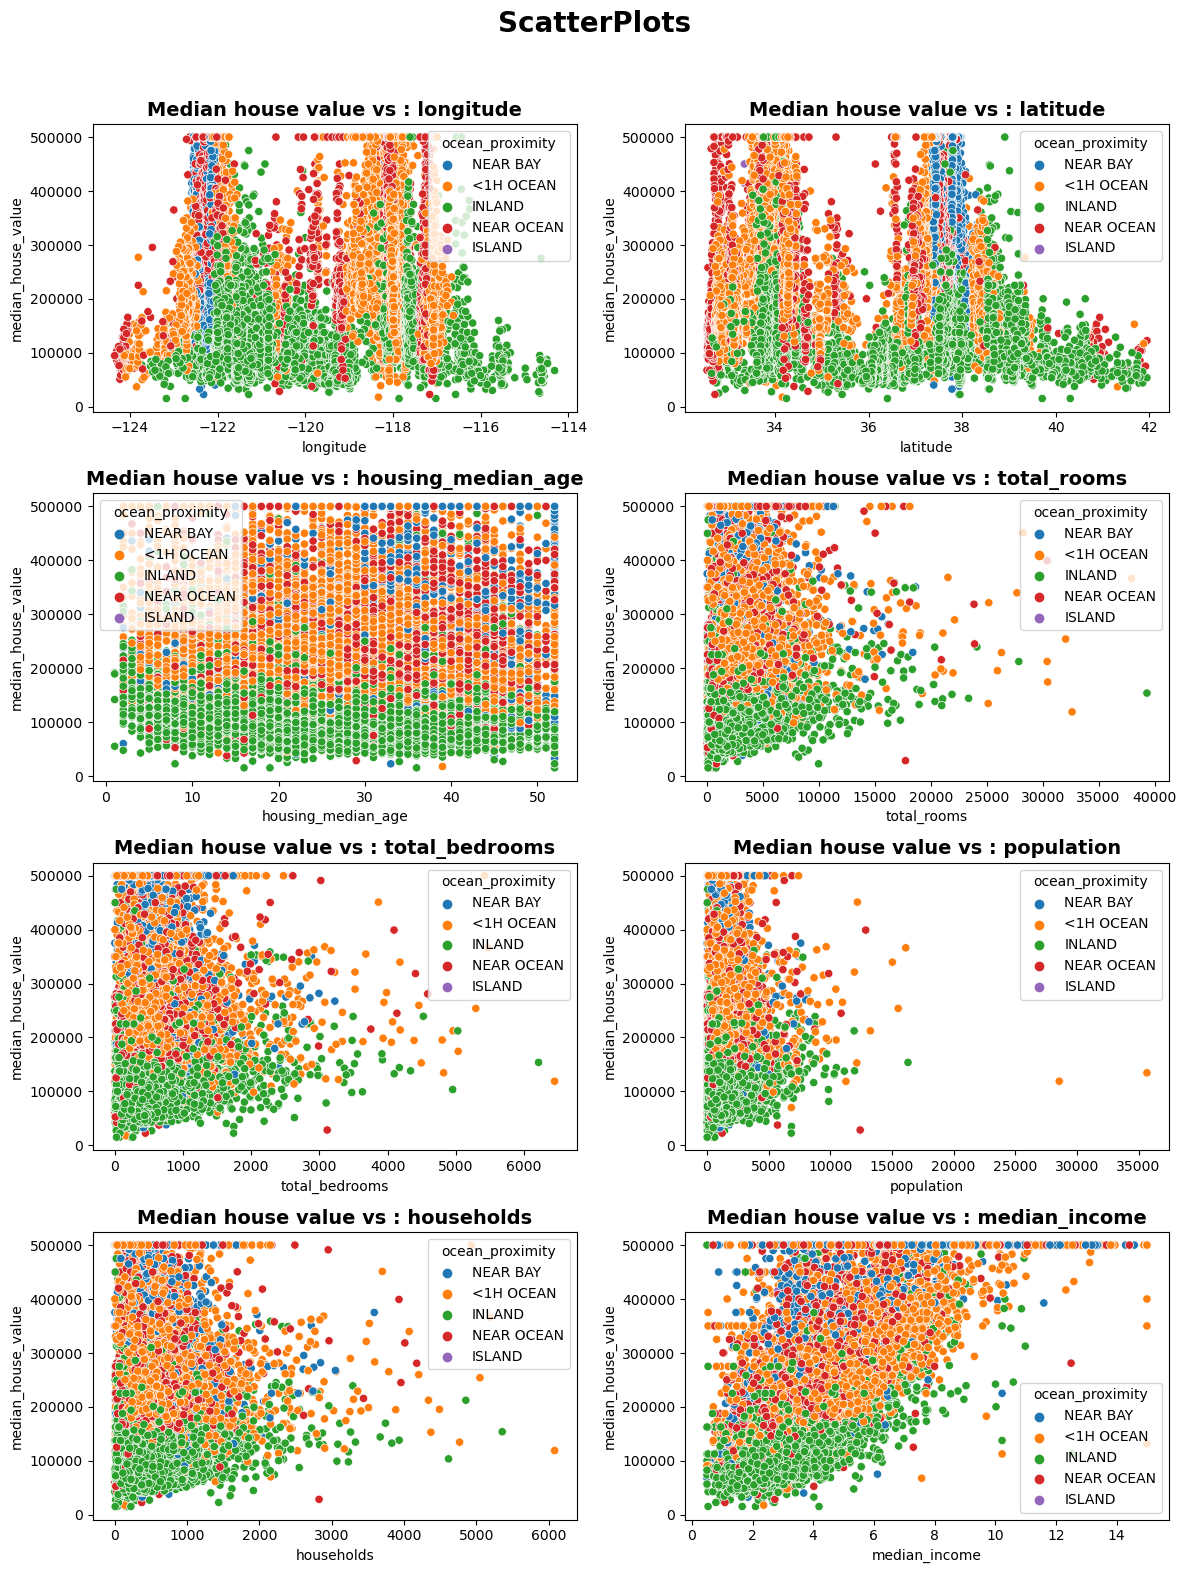

In [30]:
scatterplot(DF = houses , num_list=num_list)

### INSIGHTS

- **INLAND** Houses are cheaper compared to other **ocean_proximity** Houses.

### (iii) boxplot with hue

In [15]:
# Following features have outliers.
cols = ['total_rooms','total_bedrooms','population','households','median_income']

In [49]:
def boxplot_hue(DF , numlist , catlist):
    
    total_size_num = len(numlist) 
 
    n_cols=2
    n_rows= int(np.ceil(total_size_num/n_cols))

    fig, axes = plt.subplots(nrows=n_rows, 
                         ncols=n_cols , 
                         figsize = (15,16),
                         )

    i = 0
    j = 0

    for c in range(len(catlist)):

        cat = catlist[c]

        for n in range(len(numlist)):

            num = numlist[n]

            sns.boxplot(x = cat , y = num , data = DF , palette= 'GnBu', ax=axes[i,j])

            if j == n_cols-1:
                i = i + 1
                j = 0

            else:
                j = j + 1


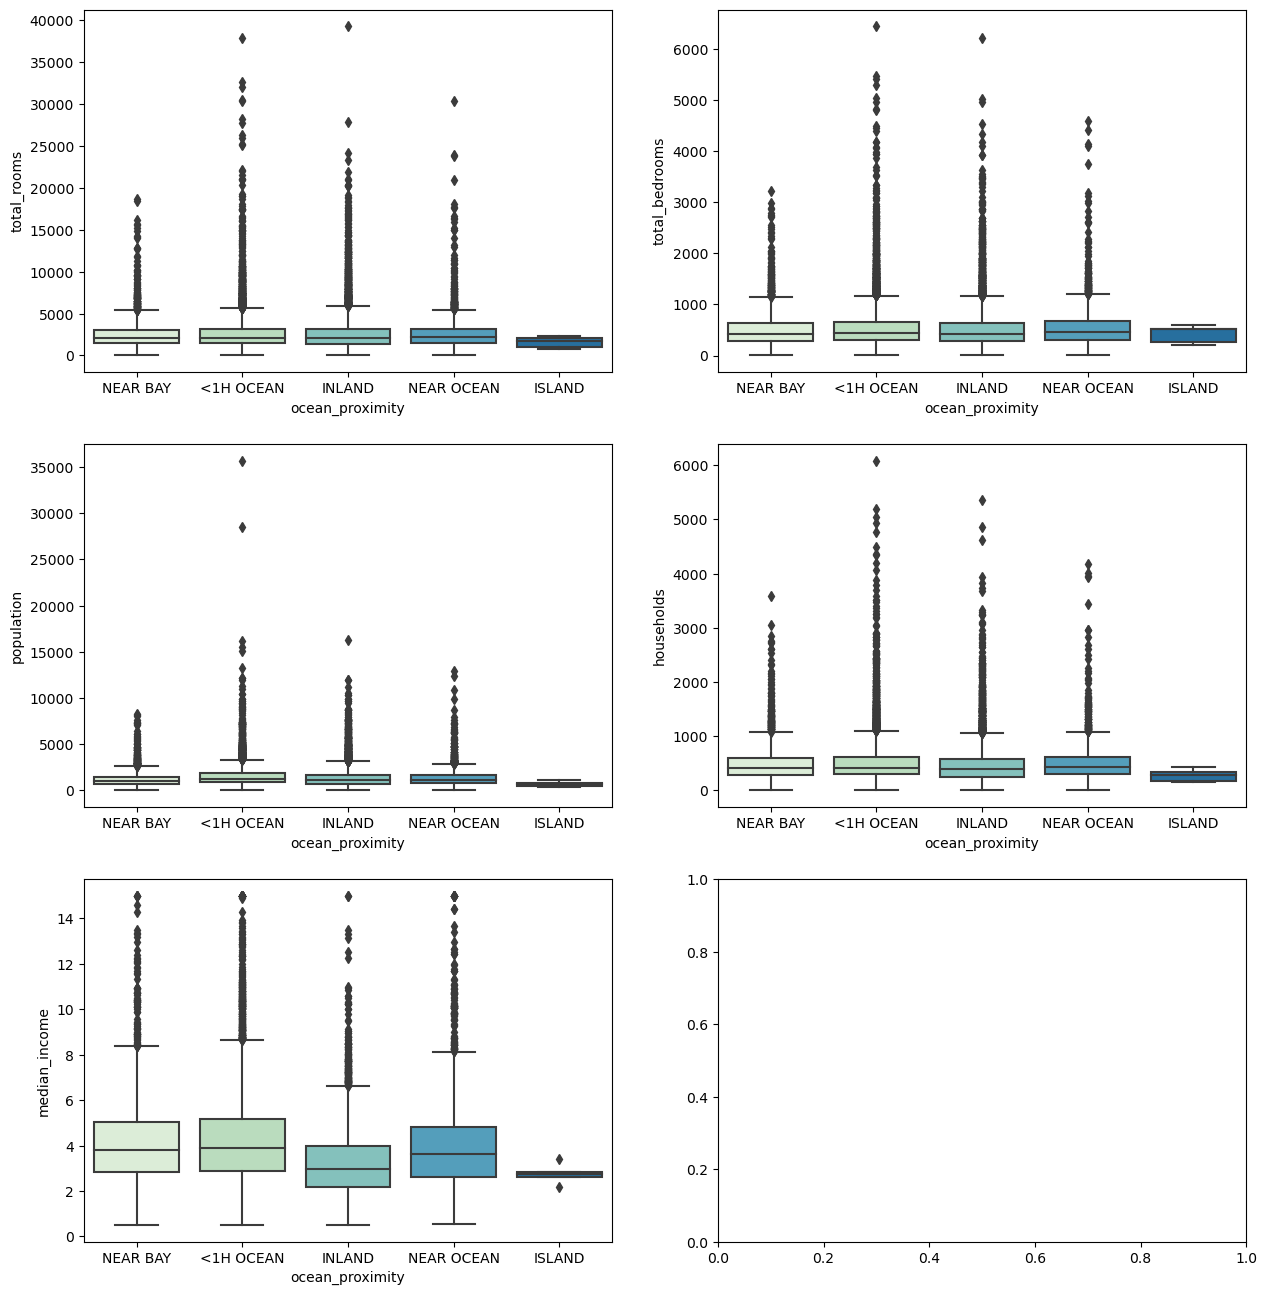

In [50]:
boxplot_hue(DF = houses , numlist=cols , catlist= cat_list)

# we're looking at the outliers corresponding to a particular Feature categoreized by ocean_proximity.

## STEP - 5 : Multi-Variate Analysis

#### From correlation analysis following conclusions have been made:

- **longitude** is highly correlated with **latitude** with correlation coefficent = -0.93
- **total_rooms** is highly correlated with **total_bedrooms**, **population** & **households** with correlation coefficent >= 0.86
- **total_bedrooms** is highly correlated with **population**, **households** with correlation coefficent >= 0.88
- **population** is highly correlated with **households** with correlation coefficent = 0.91

#### So checking them for multicollinarity

- **Threshold value** of VIF is : VIF >= 10 for dropping a Feature.


#### Syntax : variance_inflation_factor(exog, exog_idx)
- **Recommendation** <br>
 if **VIF** is greater than 5, then the explanatory variable given by **exog_idx** is highly collinear 
 with the other explanatory variables, and the parameter estimates will have large standard errors    
 because of this.



In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [19]:
df_houses = houses.copy()

In [35]:
# len(df_houses)

In [21]:
df_houses.dropna(inplace = True)

In [36]:
# len(df_houses)

In [29]:
mc_feat = ['longitude', 'latitude','total_rooms','total_bedrooms','population', 'households']

In [37]:
# df_houses.columns

In [25]:
# Defining custom function for calculating VIF

def compute_vif(feature_list ,dataframe):
    
    X = dataframe[feature_list]
    
    # Dropping any NaN values
    X.dropna(inplace = True)
    
    # Adding constant column in X
    X  = add_constant(X ,prepend=True)
    
    # Creating DF for storing VIF values
    vif = pd.DataFrame()
    vif['variable'] = X.columns
    
    
    vif['VIF'] = [variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
    
    vif = vif[vif['variable'] != 'const']
    
    return vif

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
compute_vif(feature_list = mc_feat ,dataframe = df_houses)

,variable,VIF
1,longitude,7.337294
2,latitude,7.303385
3,total_rooms,7.952192
4,total_bedrooms,31.698603
5,population,6.136152
6,households,34.898010


In [31]:
# lets remove 'households' column

mc_feat.remove('households')

In [32]:
compute_vif(feature_list = mc_feat ,dataframe = df_houses)

,variable,VIF
1,longitude,6.918832
2,latitude,6.974971
3,total_rooms,7.951829
4,total_bedrooms,9.085298
5,population,4.686775


### Conclusion : 
- We can drop the **households** Feature. (if needed)
